In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load dataset
df = pd.read_csv("SuperStoreOrders3.csv", encoding='ISO-8859-1')

In [12]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
df.shape

(9994, 21)

In [16]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [22]:
# Convert Order Date and Ship Date
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d-%m-%Y", errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d-%m-%Y", errors="coerce")

In [24]:
# Extract Year and Month
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month

In [26]:
# Sales & Profit Trends by Year
sales_trend = df.groupby("Year")["Sales"].sum()
profit_trend = df.groupby("Year")["Profit"].sum()

In [28]:
# Category-wise Sales & Profit
category_sales = df.groupby("Category")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)

In [30]:
# Top Profitable & High Sales Products
top_profitable_products = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)
top_sales_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)

In [32]:
# Impact of Discount on Profitability
discount_impact = df.groupby("Discount")[["Sales", "Profit"]].sum()

In [34]:
# Region-wise Sales & Profit
region_sales = df.groupby("Region")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)

In [36]:
# Customer Segment-wise Sales & Profit
segment_sales = df.groupby("Segment")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)

In [38]:
# Set Seaborn style
sns.set(style="whitegrid")

# Visualization 1. Percentage of Shipment 

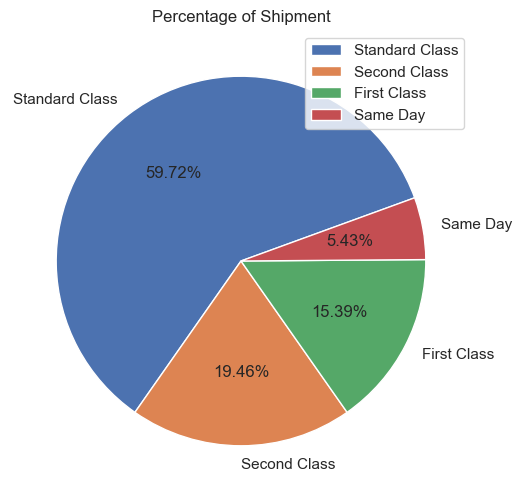

In [40]:
# --- 1. Percentage of Shipment  ---
x = df ["Ship Mode"].value_counts().index
y = df ["Ship Mode"].value_counts().values

plt.figure(figsize=(6,6))
plt.pie(y,labels=x, startangle = 20, autopct="%0.2f%%")  #rotation picechart 'startangle = 60'
plt.legend(loc=1)
plt.title("Percentage of Shipment")
plt.show()

# Visualization 2. Number of Ship Mode by Category

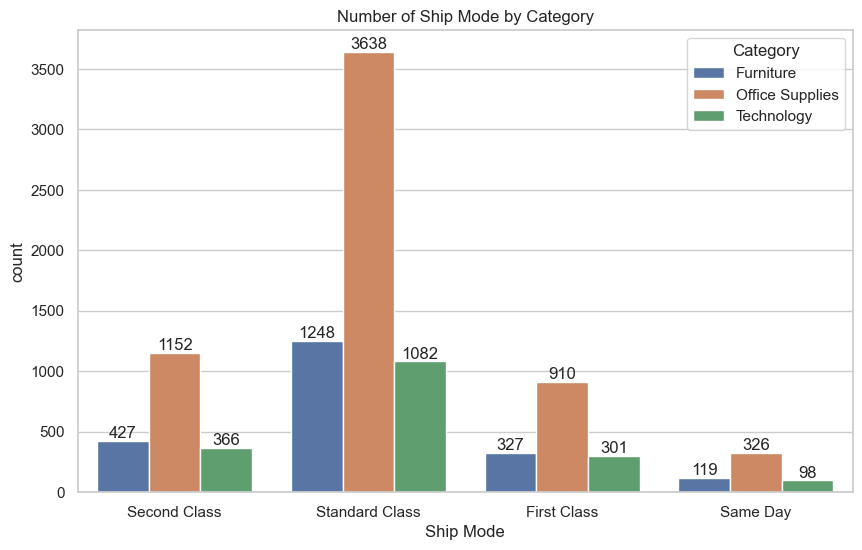

In [95]:
# --- 2. Number of Ship Mode by Category  ---   

plt.figure(figsize=(10,6))
ax = sns.countplot(x = "Ship Mode", data=df, hue="Category")
# Adding value annotations on top of the bars
for container in ax.containers:
    ax.bar_label(container)
    
plt.title("Number of Ship Mode by Category")
plt.show()

# Visualization 3. Number of Sub Category Office Supplies

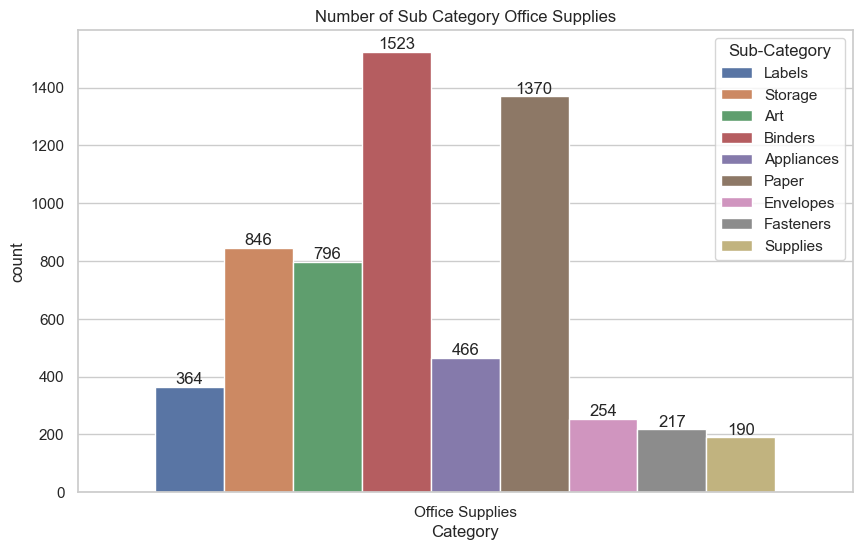

In [89]:
# --- 3. Number of Sub Category Office Supplies  ---
plt.figure(figsize=(10,6))   
ax = sns.countplot(x = "Category", data=df[df["Category"] == "Office Supplies"], hue = "Sub-Category")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Number of Sub Category Office Supplies")
plt.show()

# Visualization 4. Yearly Sales & Profit Trends   

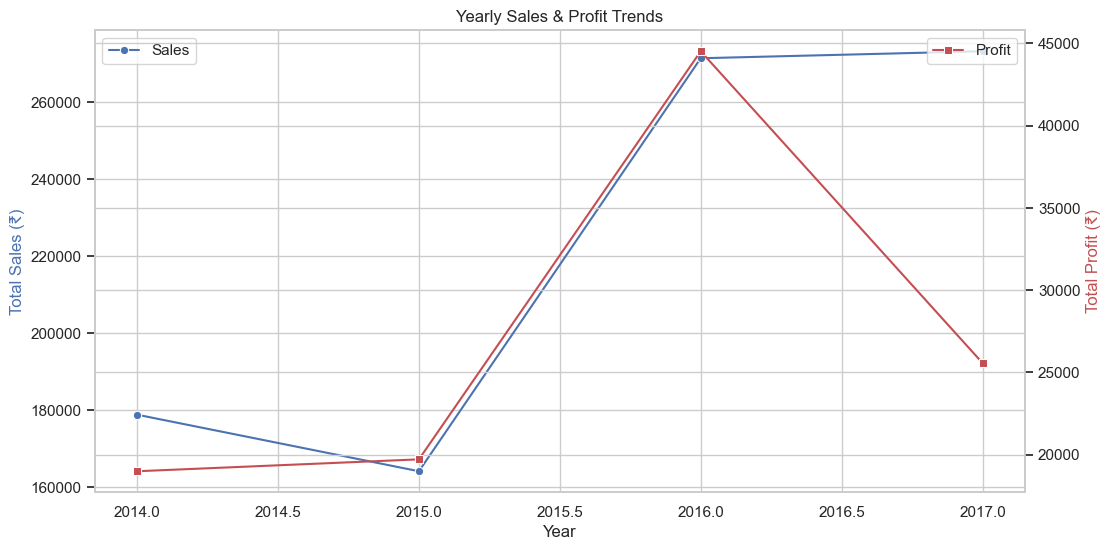

In [71]:
# --- 4. Yearly Sales & Profit Trends --- 
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

sns.lineplot(x=sales_trend.index, y=sales_trend.values, marker="o", color="b", label="Sales", ax=ax1)
ax1.set_ylabel("Total Sales (₹)", color="b")

sns.lineplot(x=profit_trend.index, y=profit_trend.values, marker="s", color="r", label="Profit", ax=ax2)
ax2.set_ylabel("Total Profit (₹)", color="r")

ax1.set_title("Yearly Sales & Profit Trends")
ax1.set_xlabel("Year")
plt.show()

# Visualization 5. Category-wise Sales & Profit

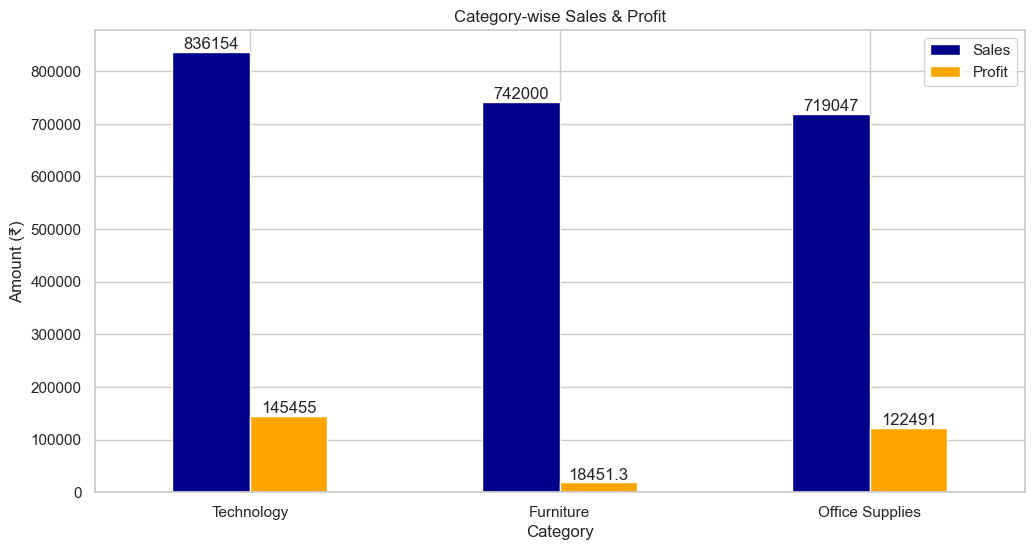

In [44]:
# --- 5. Category-wise Sales & Profit --- 
ax1 = category_sales.plot(kind="bar", figsize=(12, 6), color=["darkblue", "orange"])

ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])

plt.title("Category-wise Sales & Profit")
plt.ylabel("Amount (₹)")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.legend(["Sales", "Profit"])
plt.show()

# Visualization 6. Top 10 Profitable Products

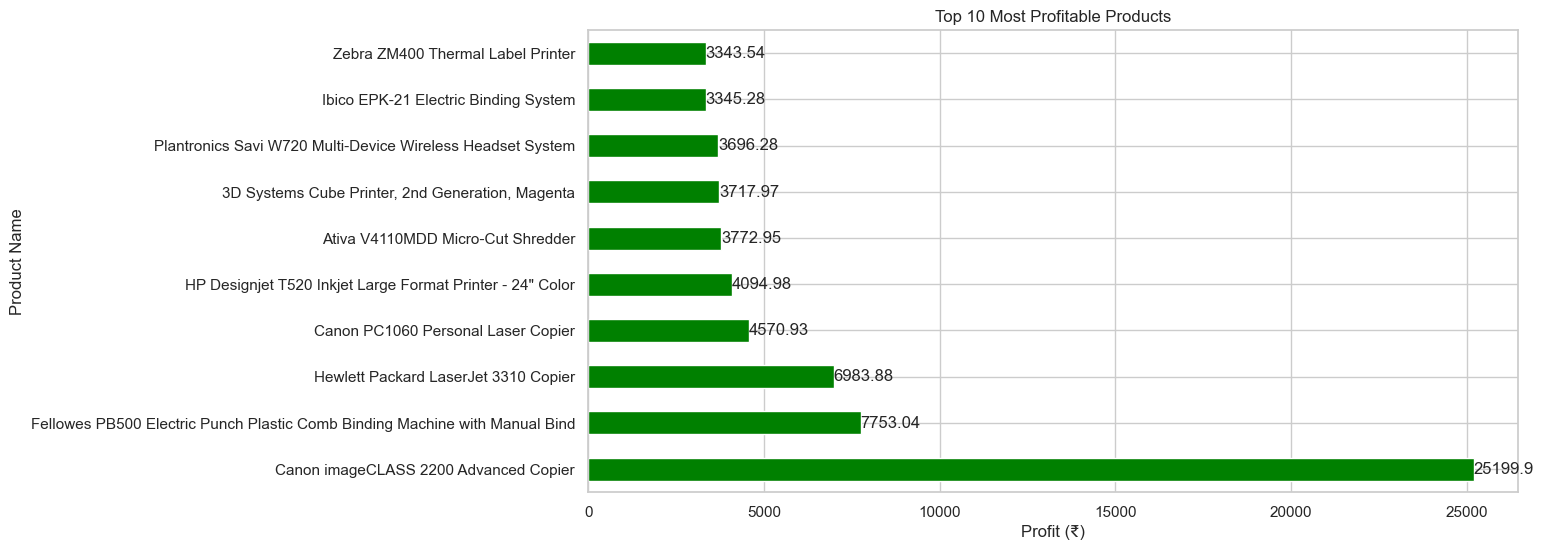

In [46]:
# --- 6. Top 10 Profitable Products --- 
ax1 = top_profitable_products.plot(kind="barh", figsize=(12, 6), color="green")
ax1.bar_label(ax1.containers[0])
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Profit (₹)")
plt.ylabel("Product Name")
plt.show()

# Visualization 7. Top 10 High Sales Products

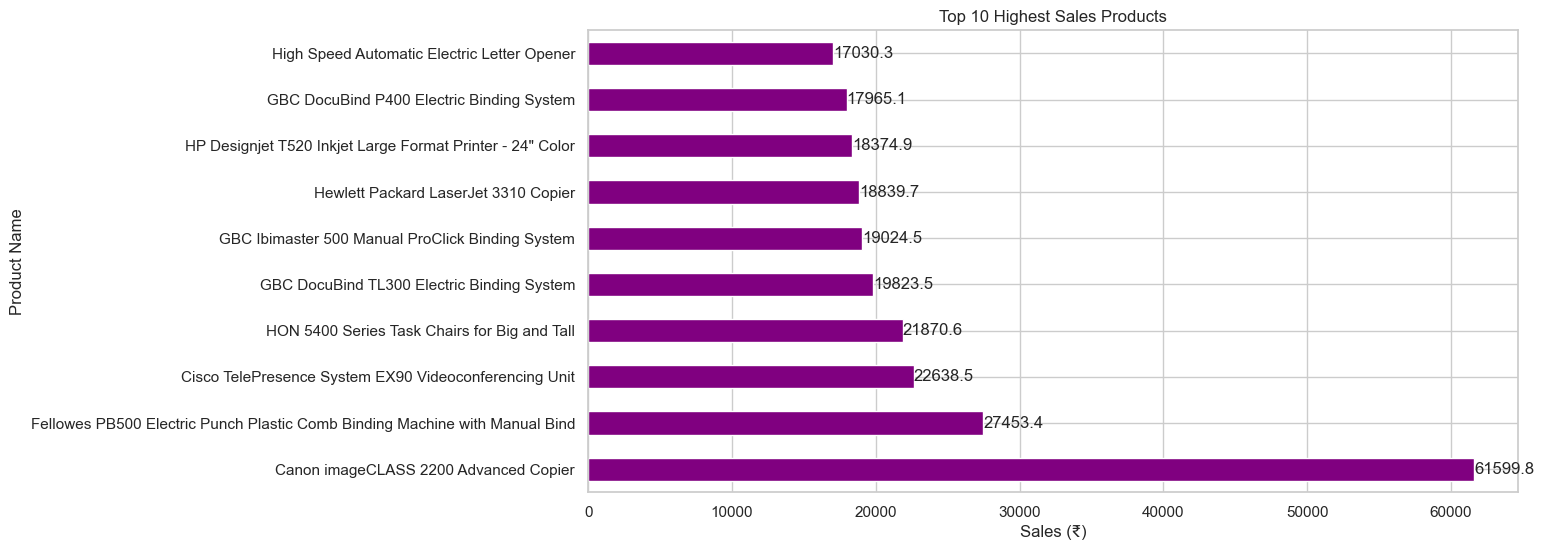

In [48]:
# --- 7. Top 10 High Sales Products ---
ax1 = top_sales_products.plot(kind="barh", figsize=(12, 6), color="purple")
ax1.bar_label(ax1.containers[0])
plt.title("Top 10 Highest Sales Products")
plt.xlabel("Sales (₹)")
plt.ylabel("Product Name")
plt.show()

# Visualization 8. Impact of Discounts on Profitability

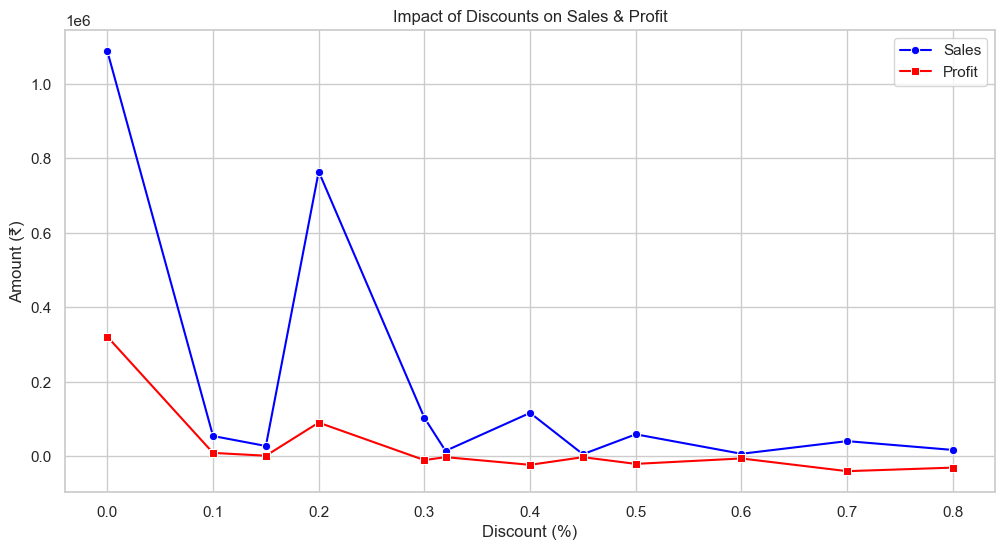

In [34]:
# --- 8. Impact of Discounts on Profitability --- 
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=discount_impact.index, y=discount_impact["Sales"], marker="o", color="blue", label="Sales")
sns.lineplot(x=discount_impact.index, y=discount_impact["Profit"], marker="s", color="red", label="Profit")

plt.title("Impact of Discounts on Sales & Profit")
plt.xlabel("Discount (%)")
plt.ylabel("Amount (₹)")
plt.legend()
plt.show()

# Visualization 9. Region-wise Sales & Profit

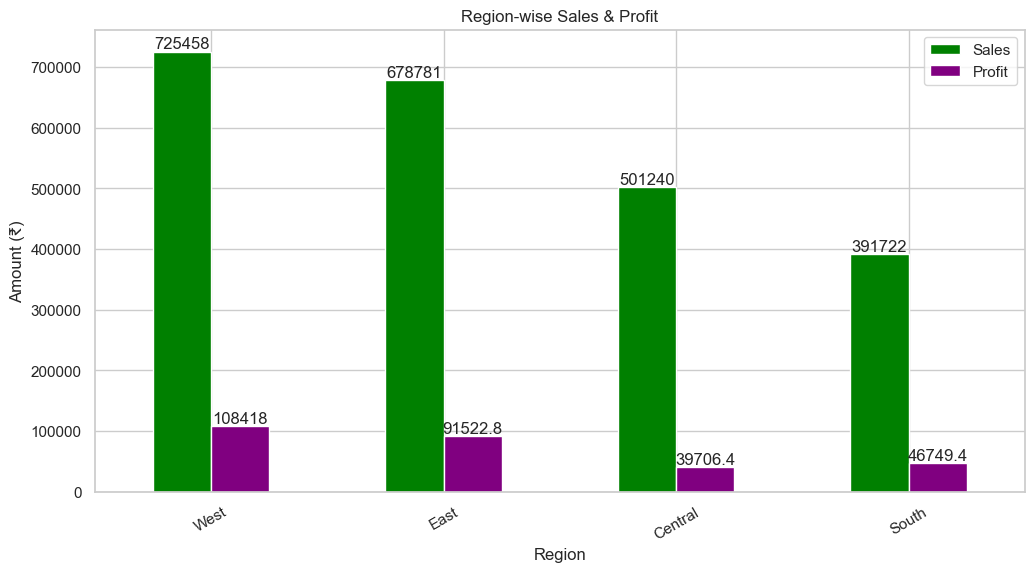

In [50]:
# --- 9. Region-wise Sales & Profit ---  
ax1 = region_sales.plot(kind="bar", figsize=(12, 6), color=["green", "purple"])
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
plt.title("Region-wise Sales & Profit")
plt.ylabel("Amount (₹)")
plt.xlabel("Region")
plt.xticks(rotation=30)
plt.legend(["Sales", "Profit"])
plt.show()

# Visualization 10. Customer Segment-wise Sales & Profit

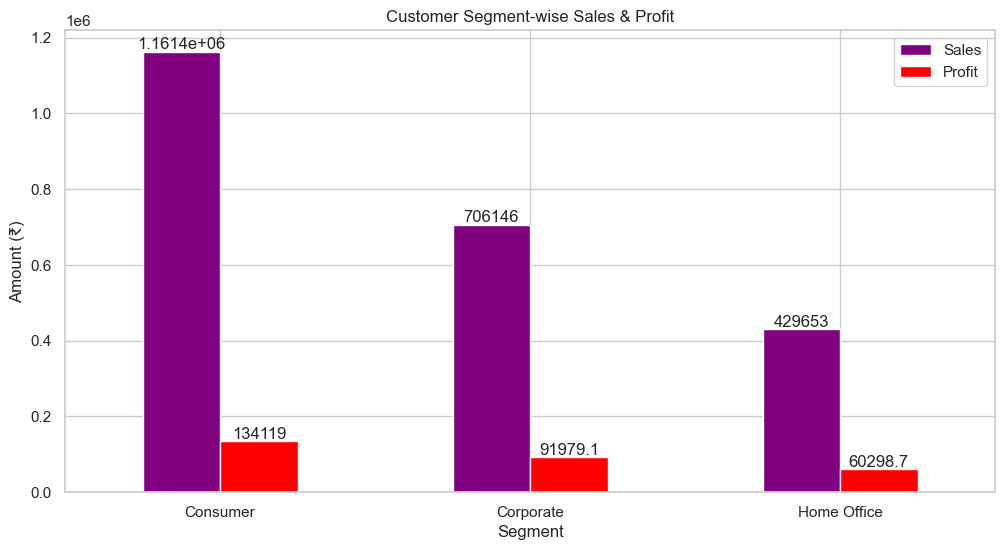

In [52]:
# --- 10. Customer Segment-wise Sales & Profit --- 
ax1 = segment_sales.plot(kind="bar", figsize=(12, 6), color=["purple", "red"])
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
plt.title("Customer Segment-wise Sales & Profit")
plt.ylabel("Amount (₹)")
plt.xlabel("Segment")
plt.xticks(rotation=0)
plt.legend(["Sales", "Profit"])
plt.show()

In [49]:
# Sample dataset creation with mixed date formats
df['Order Date'] = pd.to_datetime(df['Order Date'], format="mixed", dayfirst=True)

# Avoid division by zero
df["Product Base Margin"] = df["Profit"] / df["Sales"]
df["Product Base Margin"].fillna(0, inplace=True)  # Replace NaN values with 0

# Visualization 11. Number Product Base Margin by Category

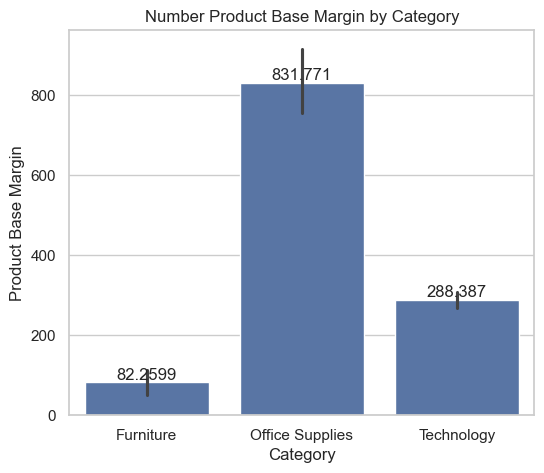

In [105]:
# --- 11. Number Product Base Margin by Category ---
plt.figure(figsize=(6,5))
ax = sns.barplot(x="Category", y="Product Base Margin", data=df, estimator="sum")
ax.bar_label(ax.containers[0])
plt.title("Number Product Base Margin by Category")
plt.show()